In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from textblob import TextBlob
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split

In [73]:
df=pd.read_csv("vaccination_tweets.csv")

In [74]:
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [75]:
print('Number of rows : ',df.shape[0])
print('Number of coluns : ',df.shape[1])

Number of rows :  11020
Number of coluns :  16


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11020 entries, 0 to 11019
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                11020 non-null  int64 
 1   user_name         11020 non-null  object
 2   user_location     8750 non-null   object
 3   user_description  10340 non-null  object
 4   user_created      11020 non-null  object
 5   user_followers    11020 non-null  int64 
 6   user_friends      11020 non-null  int64 
 7   user_favourites   11020 non-null  int64 
 8   user_verified     11020 non-null  bool  
 9   date              11020 non-null  object
 10  text              11020 non-null  object
 11  hashtags          8438 non-null   object
 12  source            11019 non-null  object
 13  retweets          11020 non-null  int64 
 14  favorites         11020 non-null  int64 
 15  is_retweet        11020 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 1.2+ MB


In [77]:
df.duplicated().sum()

0

In [78]:
df.isna().sum()

id                     0
user_name              0
user_location       2270
user_description     680
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            2582
source                 1
retweets               0
favorites              0
is_retweet             0
dtype: int64

In [79]:
df.columns

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')

In [80]:
text_df=df.drop(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date','hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],axis=1)
text_df.head()

,text
0,Same folks said daikon paste could treat a cyt...
1,While the world has been on the wrong side of ...
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...
3,"Facts are immutable, Senator, even when you're..."
4,Explain to me again why we need a vaccine @Bor...


In [81]:
text_df.duplicated().sum()

7

In [82]:
text_df=text_df.drop_duplicates()

In [83]:
text_df.isna().sum()

text    0
dtype: int64

In [84]:
ps=PorterStemmer()
def stemming(text):
    txt=re.sub('[^a-zA-Z0-9]',' ',text)
    txt=txt.lower().split()
    txt=[ps.stem(word) for word in txt if word not in stopwords.words('english')]  
    txt=' '.join(txt)
    return txt

In [85]:
text_df.text=text_df['text'].apply(stemming)

In [86]:
text_df.head()

,text
0,folk said daikon past could treat cytokin stor...
1,world wrong side histori year hope biggest vac...
2,coronaviru sputnikv astrazeneca pfizerbiontech...
3,fact immut senat even ethic sturdi enough ackn...
4,explain need vaccin borisjohnson matthancock w...


In [87]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11013 entries, 0 to 11019
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    11013 non-null  object
dtypes: object(1)
memory usage: 172.1+ KB


In [88]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [89]:
text_df['polarity']=text_df['text'].apply(polarity)

In [90]:
text_df.head()

,text,polarity
0,folk said daikon past could treat cytokin stor...,-0.25
1,world wrong side histori year hope biggest vac...,-0.50
2,coronaviru sputnikv astrazeneca pfizerbiontech...,0.00
3,fact immut senat even ethic sturdi enough ackn...,0.00
4,explain need vaccin borisjohnson matthancock w...,0.00


In [91]:
def sentiment(label):
    if label < 0 :
        return "Negative"
    elif label> 0 :
        return "Positive"
    else:
        return "Neutral"

In [92]:
text_df['sentiment']=text_df['polarity'].apply(sentiment)

In [93]:
text_df.head()

,text,polarity,sentiment
0,folk said daikon past could treat cytokin stor...,-0.25,Negative
1,world wrong side histori year hope biggest vac...,-0.50,Negative
2,coronaviru sputnikv astrazeneca pfizerbiontech...,0.00,Neutral
3,fact immut senat even ethic sturdi enough ackn...,0.00,Neutral
4,explain need vaccin borisjohnson matthancock w...,0.00,Neutral


In [94]:
text_df=text_df.drop('polarity',axis=1)

In [95]:
text_df.head()

,text,sentiment
0,folk said daikon past could treat cytokin stor...,Negative
1,world wrong side histori year hope biggest vac...,Negative
2,coronaviru sputnikv astrazeneca pfizerbiontech...,Neutral
3,fact immut senat even ethic sturdi enough ackn...,Neutral
4,explain need vaccin borisjohnson matthancock w...,Neutral


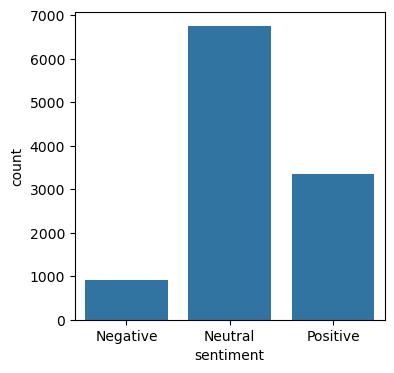

In [96]:
plt.figure(figsize=(4,4))
sns.countplot(x='sentiment',data=text_df)
plt.show()

In [97]:
neg_tweets=text_df[text_df.sentiment =='Negative']
neg_tweets.head()

,text,sentiment
0,folk said daikon past could treat cytokin stor...,Negative
1,world wrong side histori year hope biggest vac...,Negative
6,bit sad claim fame success vaccin patriot comp...,Negative
19,trump administr fail deliv vaccin promis shock...,Negative
26,wear mask wash hand remain social distant poss...,Negative


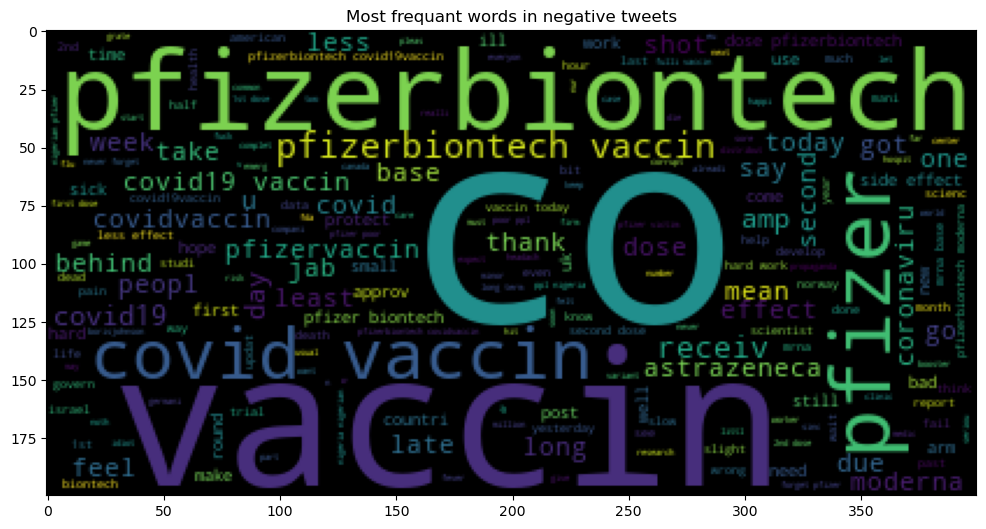

In [98]:
text_combined=' '.join(neg_tweets['text'])
plt.figure(figsize=(12,12))
wordcloud=WordCloud(background_color='black', mode='RGBA').generate(text_combined)
plt.imshow(wordcloud,interpolation=None)
plt.axis=('off')
plt.title('Most frequant words in negative tweets')

plt.show()


In [99]:
pos_tweets=text_df[text_df.sentiment =='Positive']
pos_tweets.head()

,text,sentiment
5,anyon use advic guidanc whether covid vaccin s...,Positive
7,mani bright day 2020 best 1 bidenharri win ele...,Positive
10,death close 300 000 mark million peopl wait pf...,Positive
11,cnnbrk covid19 covidvaccin vaccin corona pfize...,Positive
12,agenc also releas new inform health care provi...,Positive


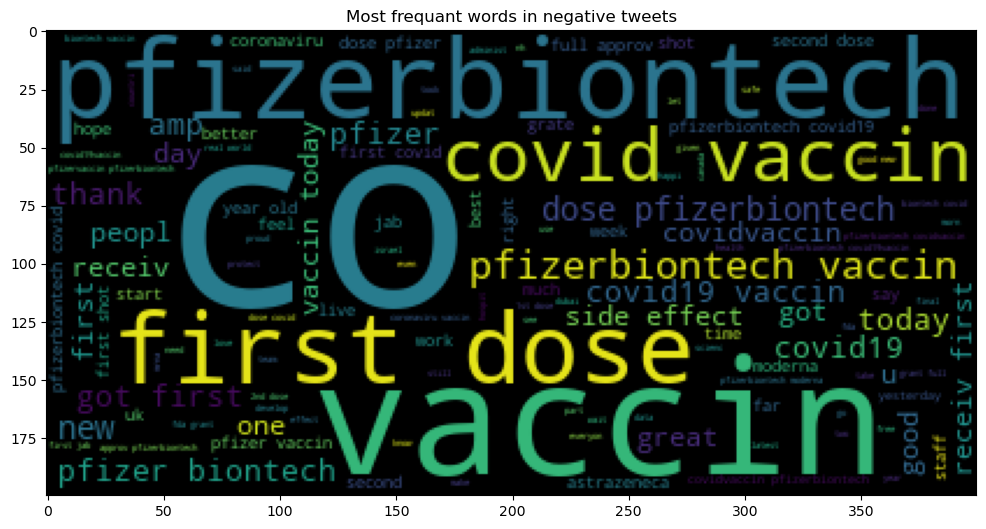

In [100]:
text_combined=" ".join(pos_tweets['text'])
plt.figure(figsize=(12,12))
wordcloud=WordCloud(background_color='black', mode='RGBA').generate(text_combined)
plt.imshow(wordcloud,interpolation=None)
plt.axis=('off')
plt.title('Most frequant words in negative tweets')
plt.show()

In [101]:
text_df['sentiment'] = text_df['sentiment'].replace({
    'Negative': 0,
    'Positive': 1,
    'Neutral': 2
})

C:\Users\hp\AppData\Local\Temp\ipykernel_14568\2082189644.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  text_df['sentiment'] = text_df['sentiment'].replace({


In [102]:
X=text_df['text']
Y=text_df['sentiment']

In [103]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfvec=TfidfVectorizer(max_features=1500,ngram_range=(1,2))
X=tfidfvec.fit_transform(X)

In [104]:
X_train,X_test,y_train,y_test= train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define models
logistic_regression = LogisticRegression()
svm = SVC()
knn = KNeighborsClassifier()
decision_tree = DecisionTreeClassifier()
gradient_boosting = GradientBoostingClassifier()
adaboost = AdaBoostClassifier()
xgboost = XGBClassifier()

models = [logistic_regression, svm, knn, decision_tree, gradient_boosting, adaboost, xgboost]

for model in models:
    print(f"Model: {model.__class__.__name__}")
    model.fit(X_train, y_train)
    ypre = model.predict(X_test)
    
    print('Accuracy  :', round(accuracy_score(y_test, ypre)*100, 3),'%')
    print('Precision :', round(precision_score(y_test, ypre, average='weighted')*100, 3),'%')
    print('Recall    :', round(recall_score(y_test, ypre, average='weighted')*100, 3),'%')
    print('F1 Score  :', round(f1_score(y_test, ypre, average='weighted')*100, 3),'%')
    print('-' * 40)


Model: LogisticRegression
Accuracy  : 90.195 %
Precision : 90.659 %
Recall    : 90.195 %
F1 Score  : 89.108 %
----------------------------------------
Model: SVC
Accuracy  : 90.967 %
Precision : 91.243 %
Recall    : 90.967 %
F1 Score  : 90.123 %
----------------------------------------
Model: KNeighborsClassifier
Accuracy  : 72.764 %
Precision : 71.364 %
Recall    : 72.764 %
F1 Score  : 70.143 %
----------------------------------------
Model: DecisionTreeClassifier
Accuracy  : 91.466 %
Precision : 91.379 %
Recall    : 91.466 %
F1 Score  : 91.415 %
----------------------------------------
Model: GradientBoostingClassifier
Accuracy  : 89.696 %
Precision : 90.29 %
Recall    : 89.696 %
F1 Score  : 89.05 %
----------------------------------------
Model: AdaBoostClassifier
Accuracy  : 73.355 %
Precision : 71.96 %
Recall    : 73.355 %
F1 Score  : 67.621 %
----------------------------------------
Model: XGBClassifier


c:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy  : 94.19 %
Precision : 94.193 %
Recall    : 94.19 %
F1 Score  : 93.905 %
----------------------------------------


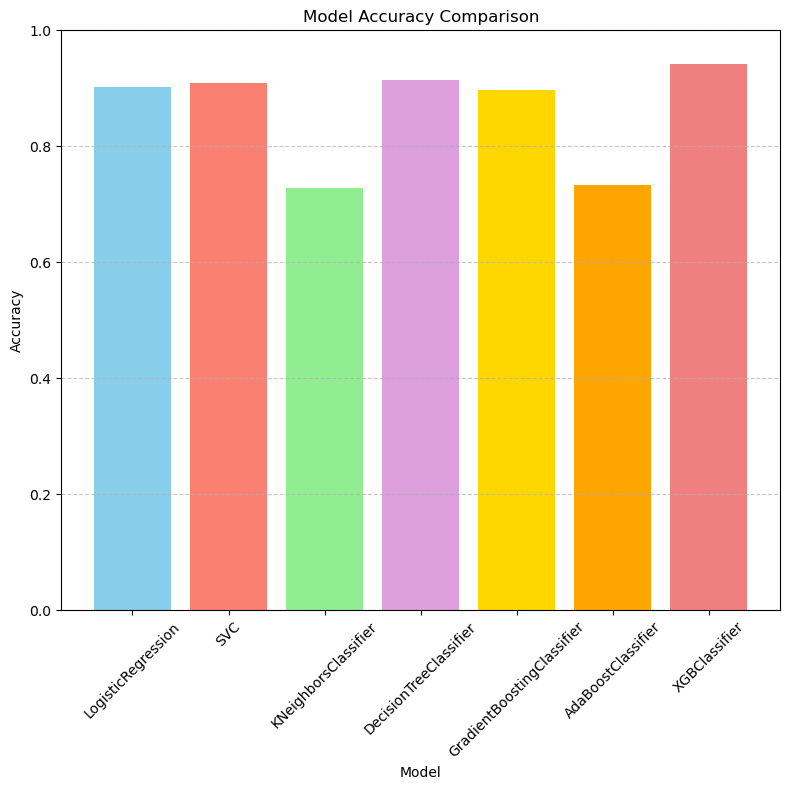

In [106]:
model_names = []
accuracies = []
for model in models:
    model_name = model.__class__.__name__
    ypre = model.predict(X_test)
    acc = round(accuracy_score(y_test, ypre), 3)
    
    model_names.append(model_name)
    accuracies.append(acc)

colors = ['skyblue', 'salmon', 'lightgreen', 'plum', 'gold', 'orange', 'lightcoral']
plt.figure(figsize=(8,8))
plt.bar(model_names, accuracies, color=colors)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [107]:
from sklearn.ensemble import VotingClassifier
ensamble=VotingClassifier(estimators=[
    ('xgb',xgboost),('svm',svm),('dtc',decision_tree)
],voting='hard')
print("Model: Ensemble (VotingClassifier)")
ensamble.fit(X_train,y_train)
en_ypre=ensamble.predict(X_test)

print('Accuracy  :', round(accuracy_score(y_test,en_ypre )*100, 3),'%')
print('Precision :', round(precision_score(y_test, en_ypre , average='weighted')*100, 3),'%')
print('Recall    :', round(recall_score(y_test, en_ypre , average='weighted')*100, 3),'%')
print('F1 Score  :', round(f1_score(y_test, en_ypre , average='weighted')*100, 3),'%')


Model: Ensemble (VotingClassifier)
Accuracy  : 94.507 %
Precision : 94.512 %
Recall    : 94.507 %
F1 Score  : 94.218 %


In [108]:
from sklearn.ensemble import StackingClassifier
base_models = [
    ('lr', logistic_regression),
    ('knn', knn),
    ('dt', decision_tree),
    ('gb', gradient_boosting),
    ('ada', adaboost),
    ('xgb', xgboost)
]

meta_model = LogisticRegression()
stacking_classifier = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model
)
stacking_classifier.fit(X_train, y_train)
stack_ypre= stacking_classifier.predict(X_test)
print("Model: StackingClassifier")
print('Accuracy  :', round(accuracy_score(y_test,stack_ypre )*100, 3),'%')
print('Precision :', round(precision_score(y_test, stack_ypre , average='weighted')*100, 3),'%')
print('Recall    :', round(recall_score(y_test, stack_ypre , average='weighted')*100, 3),'%')
print('F1 Score  :', round(f1_score(y_test, stack_ypre , average='weighted')*100, 3),'%')

Model: StackingClassifier
Accuracy  : 94.689 %
Precision : 94.646 %
Recall    : 94.689 %
F1 Score  : 94.5 %


In [109]:
import joblib
joblib.dump(stacking_classifier, 'stacking_model.pkl')
joblib.dump(tfidfvec, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']